In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# Importing the dataset
df = pd.read_csv('ml_data_salary.csv')
df.head()

,age,distance,YearsExperience,Salary
0,31.1,77.75,1.1,39343
1,31.3,78.25,1.3,46205
2,31.5,78.75,1.5,37731
3,32.0,80.00,2.0,43525
4,32.2,80.50,2.2,39891


In [2]:
# Set independent and dependent variables
X = df[['distance', 'YearsExperience']]
y = df['Salary']

In [3]:
# Initialize model from sklearn and fit it into our data
regr = linear_model.LinearRegression()
model = regr.fit(X, y)
model

LinearRegression()

In [4]:
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -218603.37708034192
Coefficients: [3258.60769705 1303.44307882]


In [5]:
# Values to predict
distance = input('How much distance you have to cover for job? \n')
YearsExperience = input('How many years of experience do you have ? \n')

try:
    print('We predict {:.0f}$ will be you salary if you have to cover {}m and have workin experience of {} years.'.format(
        model.predict([[float(distance), float(YearsExperience)]])[0],
        distance, 
        YearsExperience))
except ValueError:
    print('Please only input either:\n- whole number e.g. 1, 4, 7\n- decimal/float number e.g. 3.8')

We predict 36546$ will be you salary if you have to cover 77.5m and have workin experience of 2 years.


C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
X.shape

(30, 2)

## Plotting

In [7]:
# Prepare data
X = df[['distance', 'YearsExperience']].values.reshape(-1,2)
Y = df['Salary']

In [8]:
print(df["distance"].max())
print(df["distance"].min())

101.25
77.75


In [9]:
print(df["YearsExperience"].max())
print(df["YearsExperience"].min())

10.5
1.1


In [10]:
# Create range for each dimension
x = X[:, 0]
y = X[:, 1]
z = Y

In [11]:
xx_pred = np.linspace(77, 102, 30)  # range of distance values
yy_pred = np.linspace(1, 11, 30)  # range of YearsExperience values
xx_pred, yy_pred = np.meshgrid(xx_pred, yy_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

In [12]:
predicted = model.predict(model_viz)

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [13]:
# Evaluate model by using it's R^2 score 
r2 = model.score(X, Y)
r2
#r2 score is almost near to one so we are good to go 

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.9569566641435084

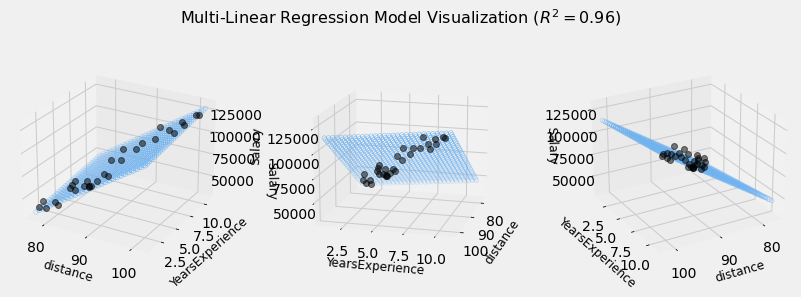

In [14]:
# Plot model visualization
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0', )
    ax.set_xlabel('distance', fontsize=12)
    ax.set_ylabel('YearsExperience', fontsize=12)
    ax.set_zlabel('Salary', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

    ax1.view_init(elev=25, azim=-60)
ax2.view_init(elev=15, azim=15)
ax3.view_init(elev=25, azim=60)

fig.suptitle('Multi-Linear Regression Model Visualization ($R^2 = %.2f$)' % r2, fontsize=16, color='k')

fig.tight_layout()

In [46]:
#FOR accuracy 
#import library 
from sklearn.model_selection import train_test_split 
X = df[["distance", "YearsExperience","age"]]
y = df["Salary"]
# slip the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
model = LinearRegression().fit(X_train, y_train)
model


LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

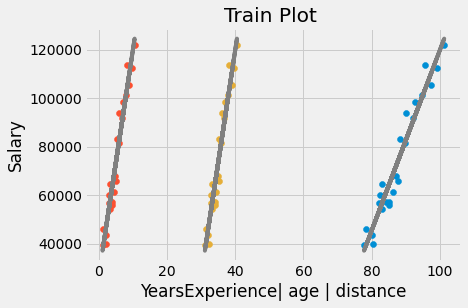

In [52]:
plt.scatter (X_train[["distance"]], y_train)
plt.scatter (X_train[["YearsExperience"]], y_train)
plt.scatter (X_train[["age"]], y_train)
plt.plot(X_train, model.predict(X_train), color = "Grey" )
plt.xlabel("YearsExperience| age | distance")
plt.ylabel("Salary")
plt.title("Train Plot ")
plt.show

In [53]:
#R2 test 
print("Score for testing data =", model.score(X_test, y_test))
print("Score for training data =", model.score(X_train, y_train))

Score for testing data = 0.9880925772756097
Score for training data = 0.9411691490005899


In [55]:
model.predict([[33 ,77.75, 1.1]])

C:\Users\Epazz\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([-5.09866629e+17])

In [56]:
y_pred =model.predict(X_test)
y_pred

array([ 40784., 122688.,  64992.,  63120., 115264., 107840.])

### Model Evaluation 
- Mean absolute error
- Mean squared error
- Root mean squared error

In [57]:
from sklearn import metrics
print (metrics.mean_absolute_error(y_test, y_pred))

2442.5


In [58]:
print(metrics.mean_squared_error(y_test, y_pred))

12906808.166666666


In [59]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

3592.604649368848
